In [35]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


data = load_diabetes()

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
forest = RandomForestRegressor(n_estimators=200, criterion='poisson', max_depth=3)
decision = DecisionTreeRegressor(max_depth=3)

model.fit(X_train, y_train)
decision.fit(X_train, y_train)
forest.fit(X_train, y_train)


y_pred_m = model.predict(X_test)
y_pred_f = forest.predict(X_test)
y_pred_d = decision.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred_m)}, RMSE: {root_mean_squared_error(y_test, y_pred_m)}, R^2: {r2_score(y_test, y_pred_m)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_d)}, RMSE: {root_mean_squared_error(y_test, y_pred_d)}, R^2: {r2_score(y_test, y_pred_d)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_f)}, RMSE: {root_mean_squared_error(y_test, y_pred_f)}, R^2: {r2_score(y_test, y_pred_f)}")




MSE: 3672.2234776962705, RMSE: 60.59887356788301, R^2: 0.38558517026113215
MSE: 4010.205983636947, RMSE: 63.3261871869525, R^2: 0.32903592561316464
MSE: 3640.1193378675707, RMSE: 60.333401510834534, R^2: 0.3909566460785947


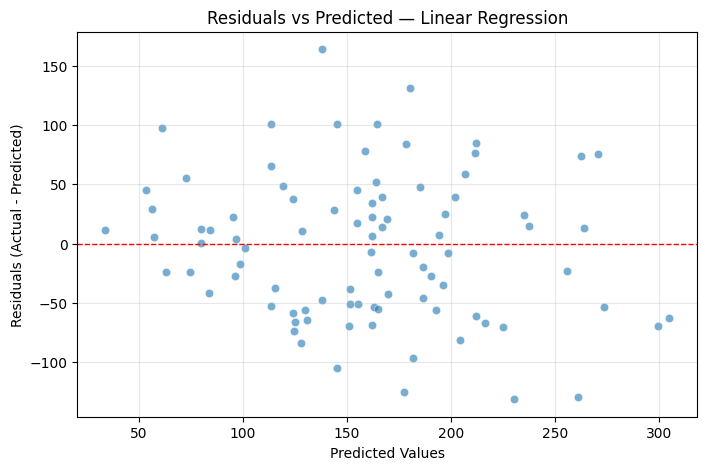

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred_m

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_m, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted — Linear Regression")
plt.grid(alpha=0.3)
plt.show()


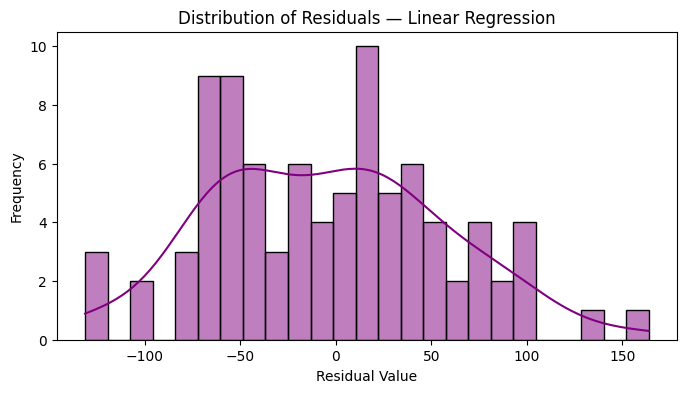

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=25, color='purple')
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals — Linear Regression")
plt.show()

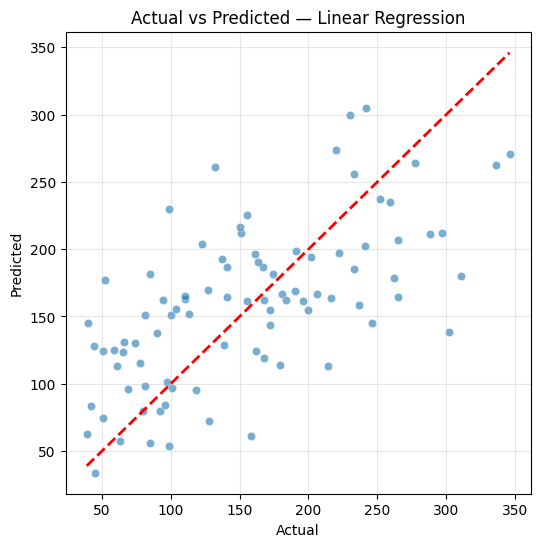

In [38]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_m, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted — Linear Regression")
plt.grid(alpha=0.3)
plt.show()

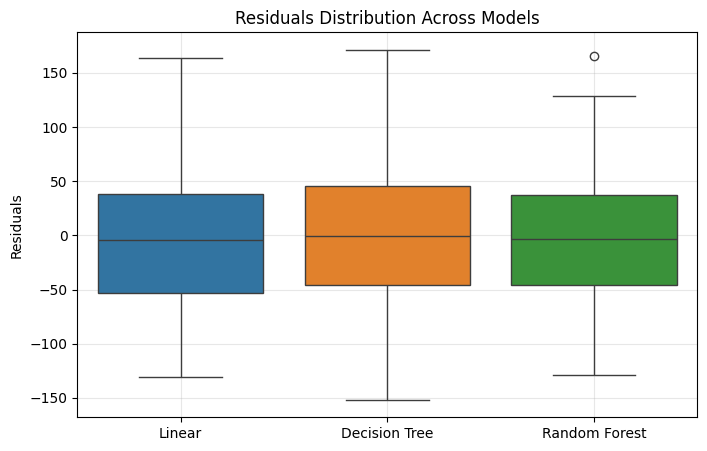

In [39]:
import pandas as pd

res_df = pd.DataFrame({
    "Linear": y_test - y_pred_m,
    "Decision Tree": y_test - y_pred_d,
    "Random Forest": y_test - y_pred_f
})

plt.figure(figsize=(8,5))
sns.boxplot(data=res_df)
plt.title("Residuals Distribution Across Models")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)
plt.show()